# Условiе
$$
f(x_1, x_2) = 3x_1 - 0.2{x_1}^2 + x_2 - 0.2{x_2}^2 (max) \\
$$
$$
\begin{equation}
  \begin{cases}
    x_1 + x_2 \le 7 \\
    x_1 + 2x_2 \le 10 \\
    x_1 \ge 0 \\
    x_2 \ge 0
  \end{cases}
\end{equation}
$$

# Рѣшенiе
## Инициализацiя:
$$
grad(f(x_1, x_2)) = (3 - 0.4x_1, 1 - 0.4x_2) \\
p_0 = (1, 2) \\
grad(p_0) = (2.6, 0.2) \ne 0 \\
$$

## Шагъ первый:
$$
p_1 = p_0 + \lambda_1 \cdot grad(f(p_0)) = (1 + 2.6 \lambda_1, 2 + 0.2 \lambda_1) \\
$$
Найдемъ ораничиненiя на параметръ лямбда:
$$
\begin{equation}
  \begin{cases}
    (1 + 2.6 \lambda_1) + (2 + 0.2 \lambda_1) \le 7 \\
    (1 + 2.6 \lambda_1) + 2 (2 + 0.2 \lambda_1) \le 10 \\
    1 + 2.6 \lambda_1 \ge 0 \\
    2 + 0.2 \lambda_1 \ge 0
  \end{cases}
\end{equation}
$$
Изъ системы уравненiй, получим:
$$\lambda_1 \in \left[-\frac{5}{13}, \frac{10}{7}\right]$$
Найдемъ оптимальный параметръ лямбда:
$$
\lambda_1 = argmax_{\lambda_1 \in \left[-\frac{5}{13}, \frac{10}{7}\right]} f(p_1) = \\ argmax_{\lambda_1 \in \left[-\frac{5}{13}, \frac{10}{7}\right]} \left(4 + 6.8 \lambda_1 - 1.36 \lambda_1^2\right) = \\ argmax_{\lambda_1 \in \left[-\frac{5}{13}, \frac{10}{7}\right]} \left(12.5 - 1.36 (\lambda_1 - 2.5)^2\right) = \\ argmin_{\lambda_1 \in \left[-\frac{5}{13}, \frac{10}{7}\right]} \bigl|\lambda_1 - 2.5\bigr| = \frac{10}{7}
$$
Такимъ образомъ:
$$
p_1 = (\frac{33}{7}, \frac{16}{7}) \\
grad(p_1) = (\frac{39}{35}, \frac{3}{35}) \ne 0
$$
Проверкой, убедимся, что мы находимся на границе прямой
$$x_1 + x_2 = 7$$
Ее направляющий вектор:
$$a_1 = (1, -1)$$
Проверимъ, можемъ ли мы улучшить наше положение на ней:
$$\left(grad(f(p_1)) \cdot a_1\right) \ne 0$$
Произведенiе не равно нулю, а значитъ точка можетъ быть улучшена. Найдемъ рѣшенiе следующего уравненiя, оно и будетъ искомымъ максимумомъ:
$$
\begin{equation}
\begin{cases}
\left(grad(f(x_1, x_2)) \cdot a_1\right) \\
x_1 + x_2 = 7 \\
\end{cases}
\end{equation}
\newline

\begin{equation}
\begin{cases}
(3 - 0.4x_1, 1 - 0.4x_2) \cdot (1, -1) = 0 \\
x_1 + x_2 = 7 \\
\end{cases}
\end{equation}
\newline

\begin{equation}
\begin{cases}
x_1 - x_2 = 5 \\
x_1 + x_2 = 7 \\
\end{cases}
\end{equation}
\newline

p_2 = (6, 1)\ –\ рѣшенiе\ уравненiя\ и\ искомый\ максимумъ.
$$

## Отвѣтъ:
$$(6, 1)\ –\ max$$

In [1]:
# Импортируем все необходимое
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Функция, проверяющая соблюдение границы ax + by + c ≤ 0
def check_bound(bound, point):
  a, b, c = bound
  x, y = point
  res = a * x + b * y + c
  return res <= 0


def get_mesh(func, scope, density=1000):
  # Сгенерируем точки сетки и получим высоты в каждой из них:
  x_min, x_max, y_min, y_max = scope
  x = np.linspace(x_min, x_max, density)
  y = np.linspace(y_min, y_max, density)
  xm, ym = np.meshgrid(x, y)
  zm = func(xm, ym)
  z_min, z_max = zm.min(), zm.max()
  return x, y, xm, ym, zm, x_min, x_max, y_min, y_max, z_min, z_max


def get_bound_line(bound, x, y):
  a, b, c = bound
  x_line, y_line = x, y

  if np.isclose(b, 0.):
    x_line = -c/a * np.ones(y_line.shape[0])
  else:
    y_line = - (c + a * x) / b
  return x_line, y_line


def remove_knocked_out_points(scope, x, y):
  x_min, x_max, y_min, y_max = scope
  arr = [[px, py] for px, py in np.transpose([x, y]) if x_min <= px <= x_max and y_min <= py <= y_max]
  return np.transpose(arr) if len(arr) > 0 else np.array([[], []])


def plot_3d(func, scope, path, bounds=[], view_elev=None, view_azim=None, density=1000):
  x, y, xm, ym, zm, x_min, x_max, y_min, y_max, z_min, z_max = get_mesh(func, scope, density)
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  fig.set_size_inches(16, 9)
  ax.view_init(elev=view_elev, azim=view_azim)
  ax.set_xlim(x_min, x_max)
  ax.set_ylim(y_min, y_max)
  ax.set_zlim(z_min, z_max)
  ax.zaxis.set_major_locator(matplotlib.ticker.LinearLocator(10))
  ax.zaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.2f}"))

  surf = ax.plot_surface(xm, ym, zm, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, alpha=0.25)
  
  x_inner, y_inner = np.transpose([p for p in itertools.product(x, y) if all([check_bound(bound, p) for bound in bounds])])
  z_inner = func(x_inner, y_inner)
  ax.plot(x_inner, y_inner, z_inner, linewidth=2, alpha=0.5)

  for bound in bounds:
    x_line, y_line = remove_knocked_out_points(scope, *get_bound_line(bound, x, y))
    z_line = func(x_line, y_line)
    ax.plot(x_line, y_line, z_line, '-b')
  
  x_path, y_path = np.transpose(path)
  z_path = func(x_path, y_path)
  ax.plot(x_path, y_path, z_path, '-g', linewidth=2)
  ax.scatter(x_path[-1:], y_path[-1:], z_path[-1:], color='r')

  plt.show()

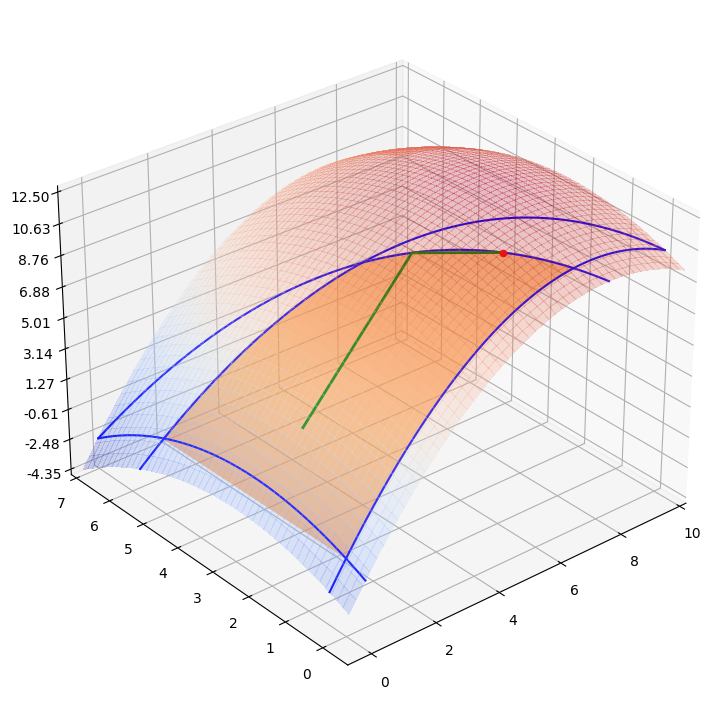

In [2]:
func = lambda x, y: 3*x - 0.2*x**2 + y -0.2*y**2
bounds = [
    [1, 1, -7], # x + y ≤ 7
    [1, 2, -10], # x + 2y ≤ 10
    [-1, 0, 0], # x ≥ 0
    [0, -1, 0]  # y ≥ 0
]

scope = [-0.5, 10, -0.5, 7]
path = np.array([[1, 2], [33/7, 16/7], [6, 1]])
plot_3d(func, scope, path, bounds=bounds, view_azim=230)